# 3 Thermophysical Properties

In [1]:
import numpy as np
from models_2_0 import *
from plots_2_0 import *
from IPython.display import Markdown, display

# Excel spreadsheet and material name strings
excel_filename = 'Tungsten_data.xlsx'
material_name = "Tungsten"

RT = 273
f_size = 10
legend_size = 6
m_size = 35

## 3.1 Density

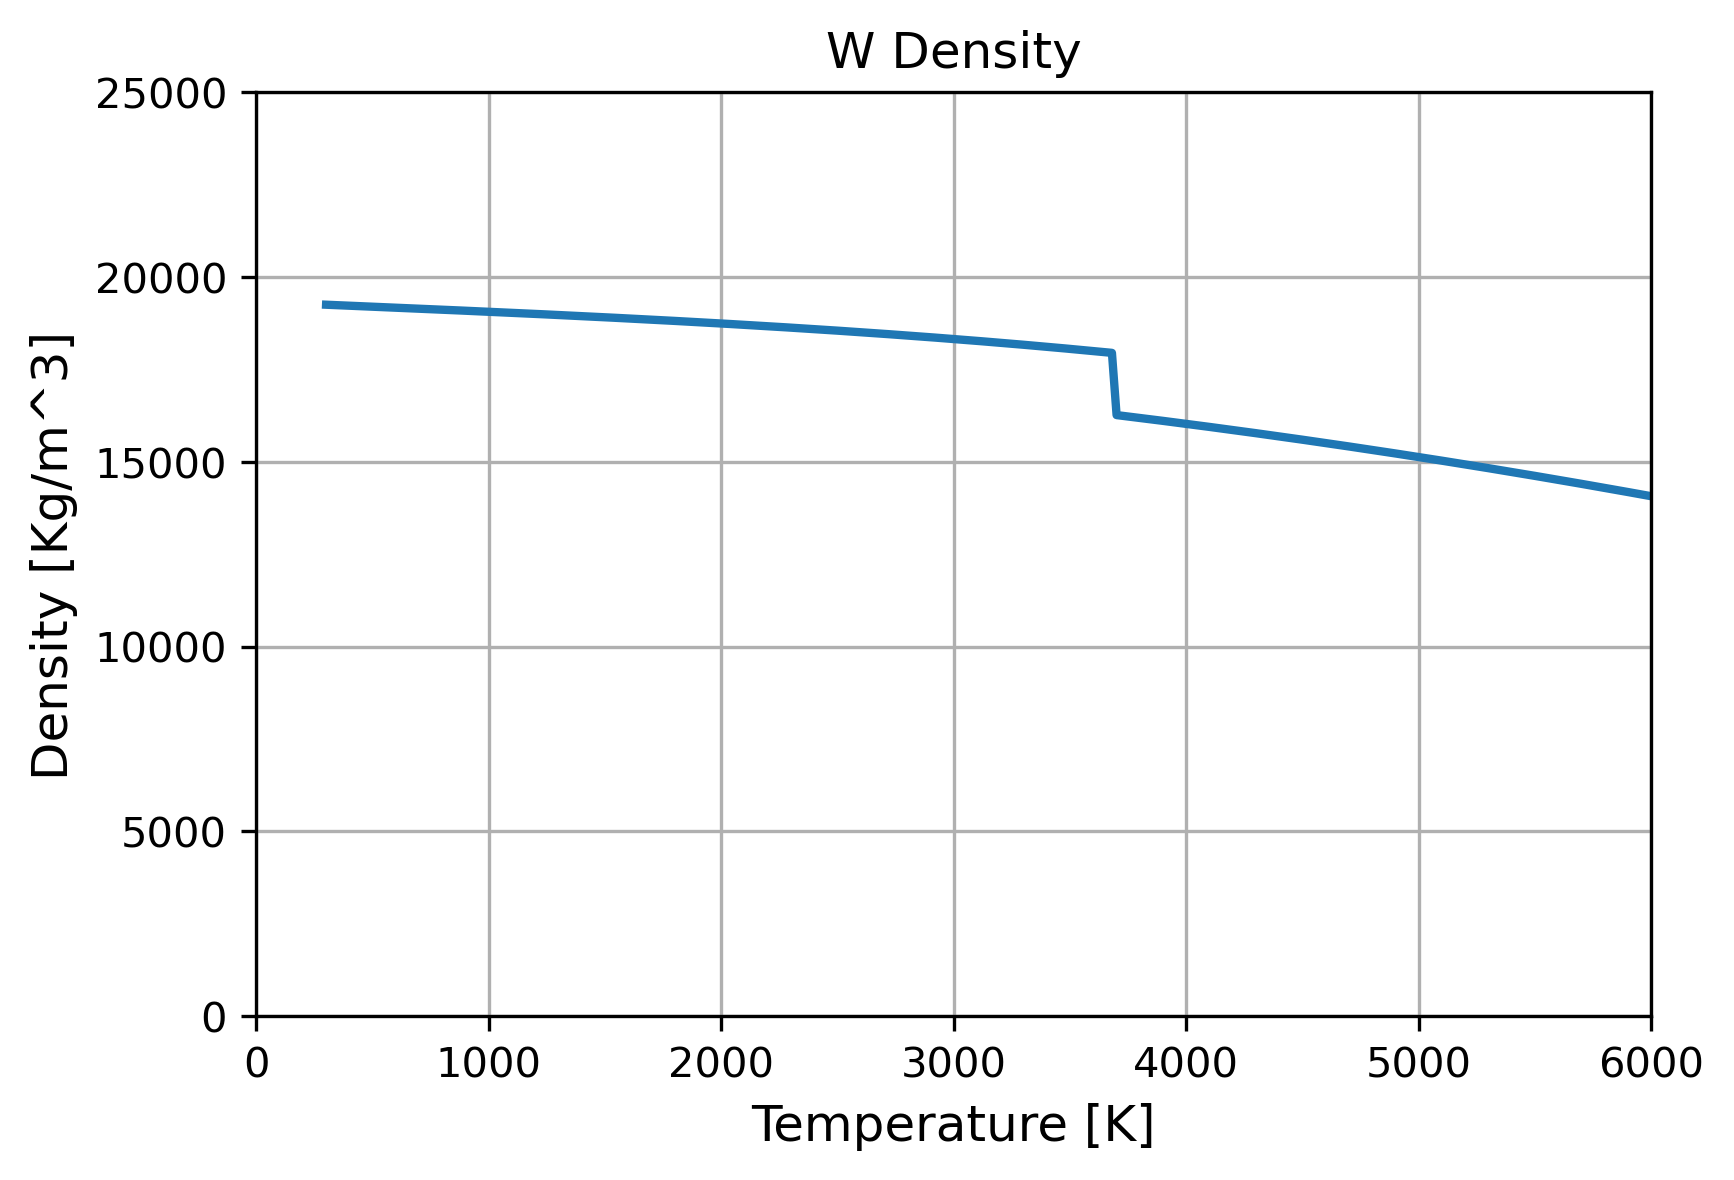

In [2]:
def W_rho(T):
    if 0 <= T <= 3695:
        rho = 19.25 - 2.66207e-4 * (T - 298) - 3.0595e-9 * (T - 298)**2 - 9.5185e-12 * (T - 298)**3
    elif 3695 < T <= 6000:
        rho = 16.267 - 7.679e-4 * (T - 3695) - 8.091e-8 * (T - 3695)**2
    else:
        raise ValueError("Temperature is out of the expected range (0K to 6000K)")
    
    return rho * 1e3

T = np.arange(300, 6001, 20)
rho = np.array([W_rho(t) for t in T])

title='W Density'
xlabel='Temperature [K]'
ylabel='Density [Kg/m^3]'
xlim_range=[0, 6000]
ylim_range=[0, 25e3]
plt.figure(figsize=(6, 4), dpi=300)
generic_plot(x_data=T, y_data=rho, shift=0, title=title, xlabel=xlabel, ylabel=ylabel, xlim_range=xlim_range, ylim_range=ylim_range, label=None, fsize1=12, fsize2=fsize2, fsize3 = 8)

## 3.2 Coefficient of Thermal Expansion

,EUROFER97TempF,EUROFER97CoefficientofThermalExpansion
0,799.640820,2.423116
1,2195.319239,2.760268
2,3619.283612,4.164268



**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)


C:\Users\indro\miniconda3\envs\jb\Lib\site-packages\lmfit\model.py:1730: RuntimeWarning: invalid value encountered in divide
  fjac[key][i] = (np.atleast_1d(res1[key]).view('float64').ravel()


**Fitting parameters for Tungsten W_CTE** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 3
    # variables        = 3
    chi-square         = 3.000e-250
    reduced chi-square = 0.00000000
    Akaike info crit   = -1720.93882
    Bayesian info crit = -1723.64298
##  Warning: uncertainties could not be estimated:
[[Variables]]
    c0:  2.67610567 +/- 0.00000000 (0.00%) (init = 1)
    c1: -9.5802e-04 +/- 0.00000000 (0.00%) (init = 1)
    c2:  8.5539e-07 +/- 0.00000000 (0.00%) (init = 2)


**The equations for Tungsten W_CTE are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

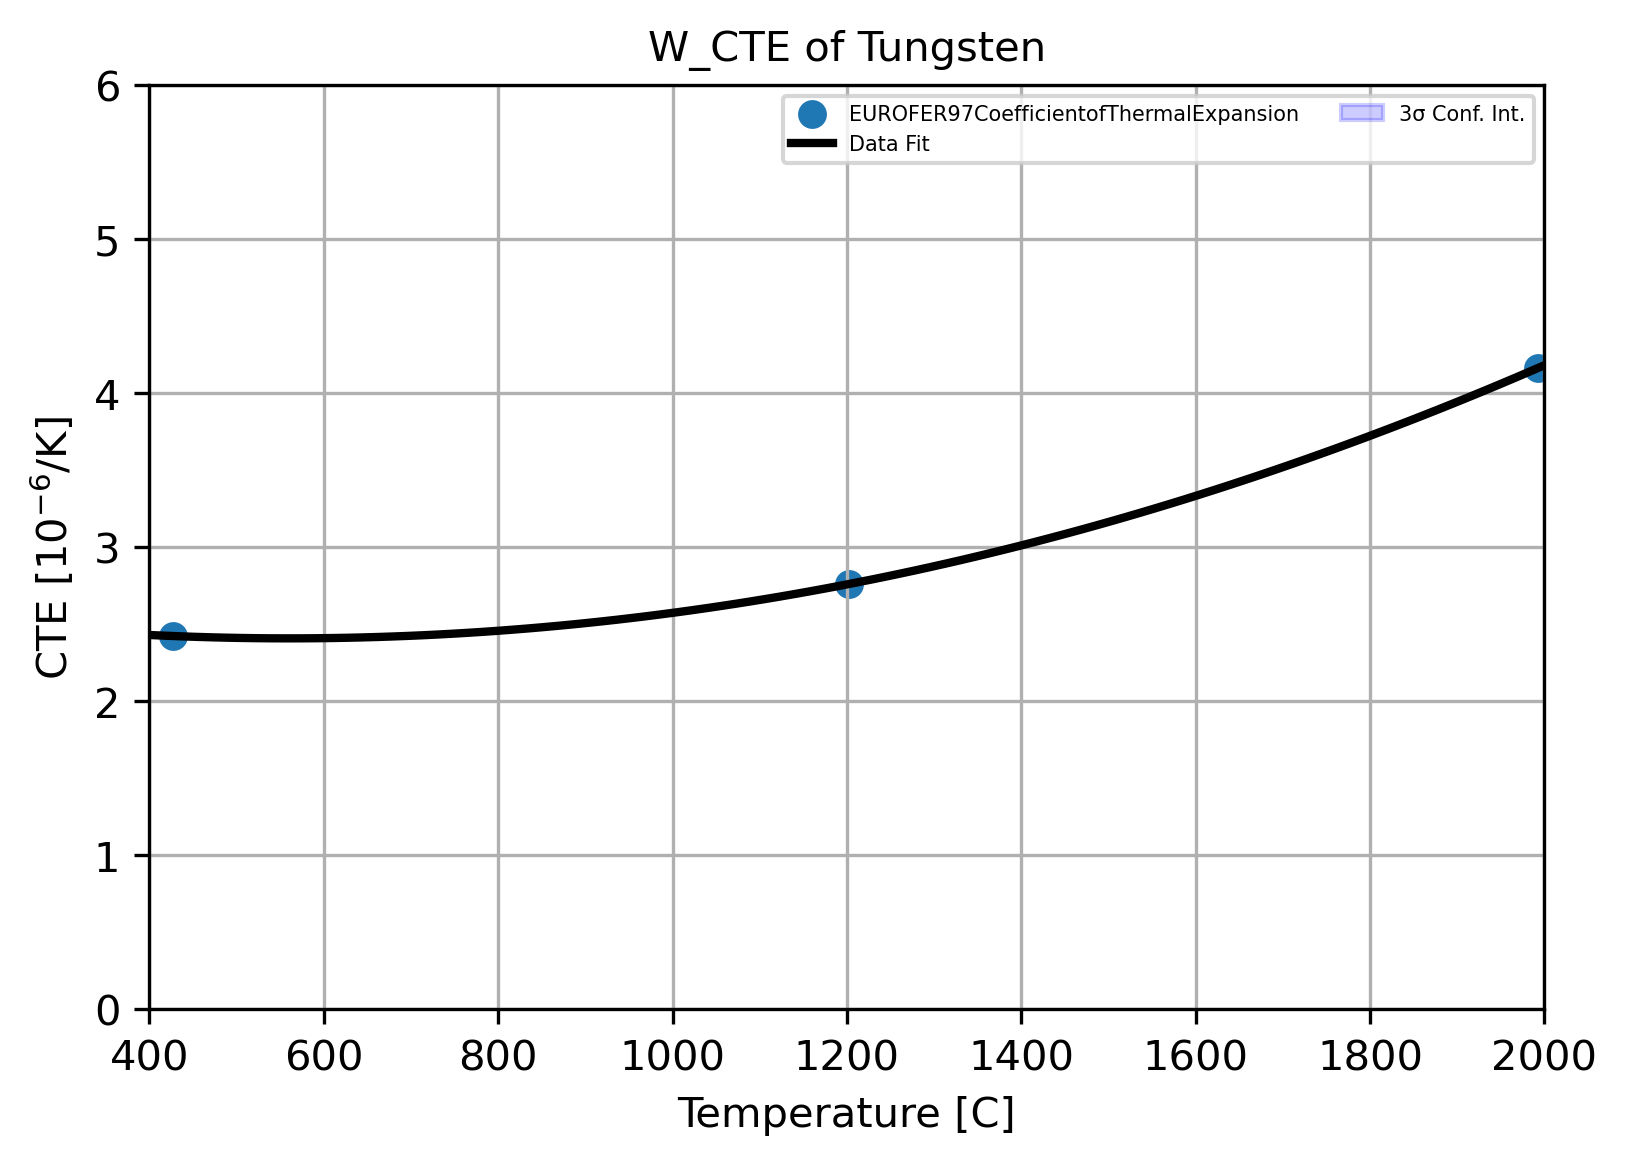

In [3]:
material_property = "W_CTE"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7)

x_label='Temperature [C]'
y_label=r'CTE [$10^{-6}$/K]'
x_lim=[400,2000]
y_lim=[0, 6]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = (np.array(variables[::2])-32)/1.8
vars_y = variables[1::2]

# Fit the data
p = [1, 1, 1]
T = np.linspace(300,2000,100)
fit_result = get_model_fit_and_print_it(vars_x, vars_y, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(vars_x, vars_y, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

CTE_coef = [fit_result.params[key].value for key in fit_result.params]

def CTE(T):
    return sum(CTE_coef[i] * T**i for i in range(len(CTE_coef)))

## 3.3 Specific Heat

,WTempK,WCp
0,1260.862944,6.774831
1,1350.518020,6.849642
2,1432.294615,6.914544
3,1500.257352,6.989002
4,1600.753775,7.068879
5,1623.412843,7.088809
6,1680.539054,7.153310
7,1714.034647,7.183195
8,1782.021492,7.233203
9,1810.548436,7.302128



**Data Source:**  
- [Lowenthal1962--The specific heat of metals between 1200 K and 2400 K.](https://drive.google.com/file/d/1Lht4yt4lj6nqYwLpXq2Aohu_0Uwa07xr/view?usp=drive_link)


**Fitting parameters for Tungsten W_specific_heat** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 22
    # variables        = 4
    chi-square         = 4.47791939
    reduced chi-square = 0.24877330
    Akaike info crit   = -27.0214466
    Bayesian info crit = -22.6572768
    R-squared          = 0.99734226
[[Variables]]
    c0:  59.5446165 +/- 20.1649719 (33.87%) (init = 1)
    c1:  0.15498333 +/- 0.03406524 (21.98%) (init = 1)
    c2: -8.6809e-05 +/- 1.8817e-05 (21.68%) (init = 1)
    c3:  1.8477e-08 +/- 3.4028e-09 (18.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9986
    C(c1, c2) = -0.9984
    C(c0, c1) = -0.9982
    C(c1, c3) = +0.9941
    C(c0, c2) = +0.9933
    C(c0, c3) = -0.9859


**The equations for Tungsten W_specific_heat are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

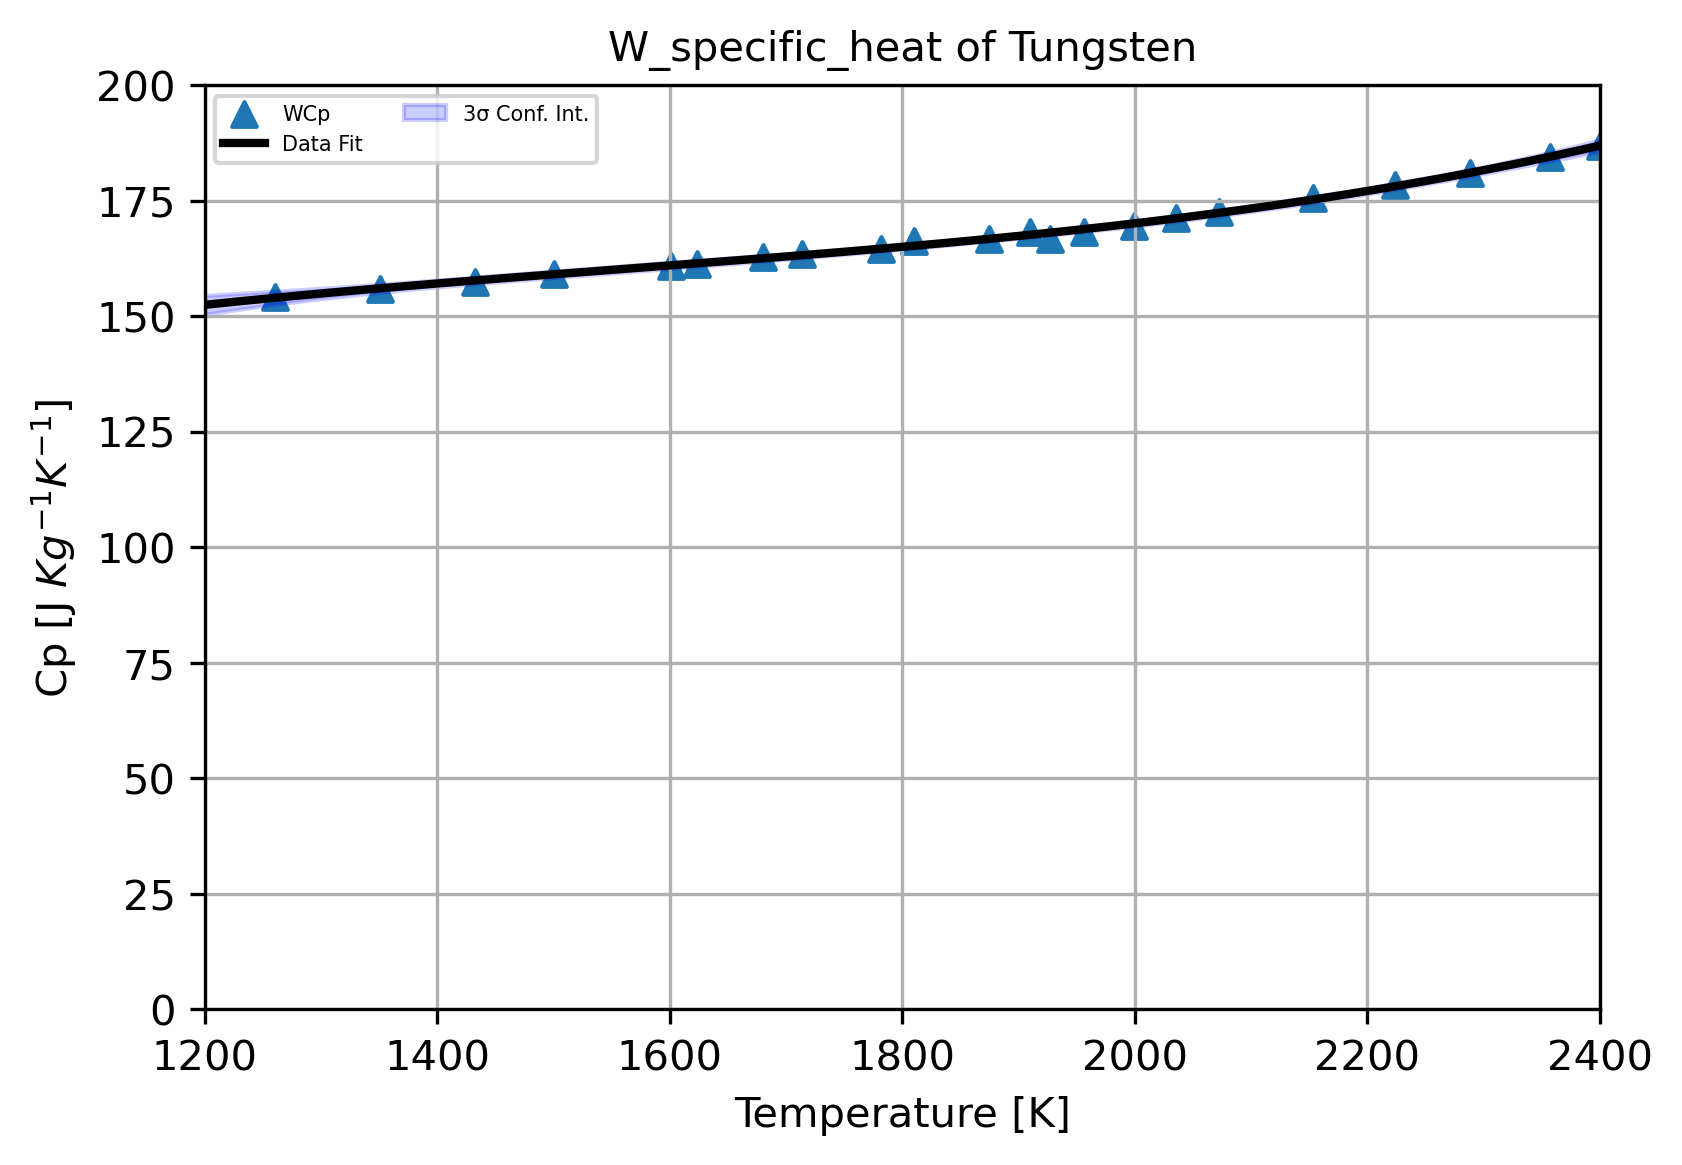

In [4]:
material_property = "W_specific_heat"
var_names, variables, df = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=23)
x_label = 'Temperature [K]'
y_label = r'Cp [J $Kg^{-1} K^{-1}$]'
x_lim = [1200, 2400]
y_lim = [0, 200]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Lowenthal1962--The specific heat of metals between 1200 K and 2400 K.](https://drive.google.com/file/d/1Lht4yt4lj6nqYwLpXq2Aohu_0Uwa07xr/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = [vars_y[0]*22.76]

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(1200,2400,1200)
fit_result = get_model_fit_and_print_it(T_data, Y_data*22.76, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

cp_coef = [fit_result.params[key].value for key in fit_result.params]

def SpecificHeat(T):
    return sum(cp_coef[i] * T**i for i in range(len(cp_coef)))

## 3.4 Thermal Conductivity


**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant.pdf](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)


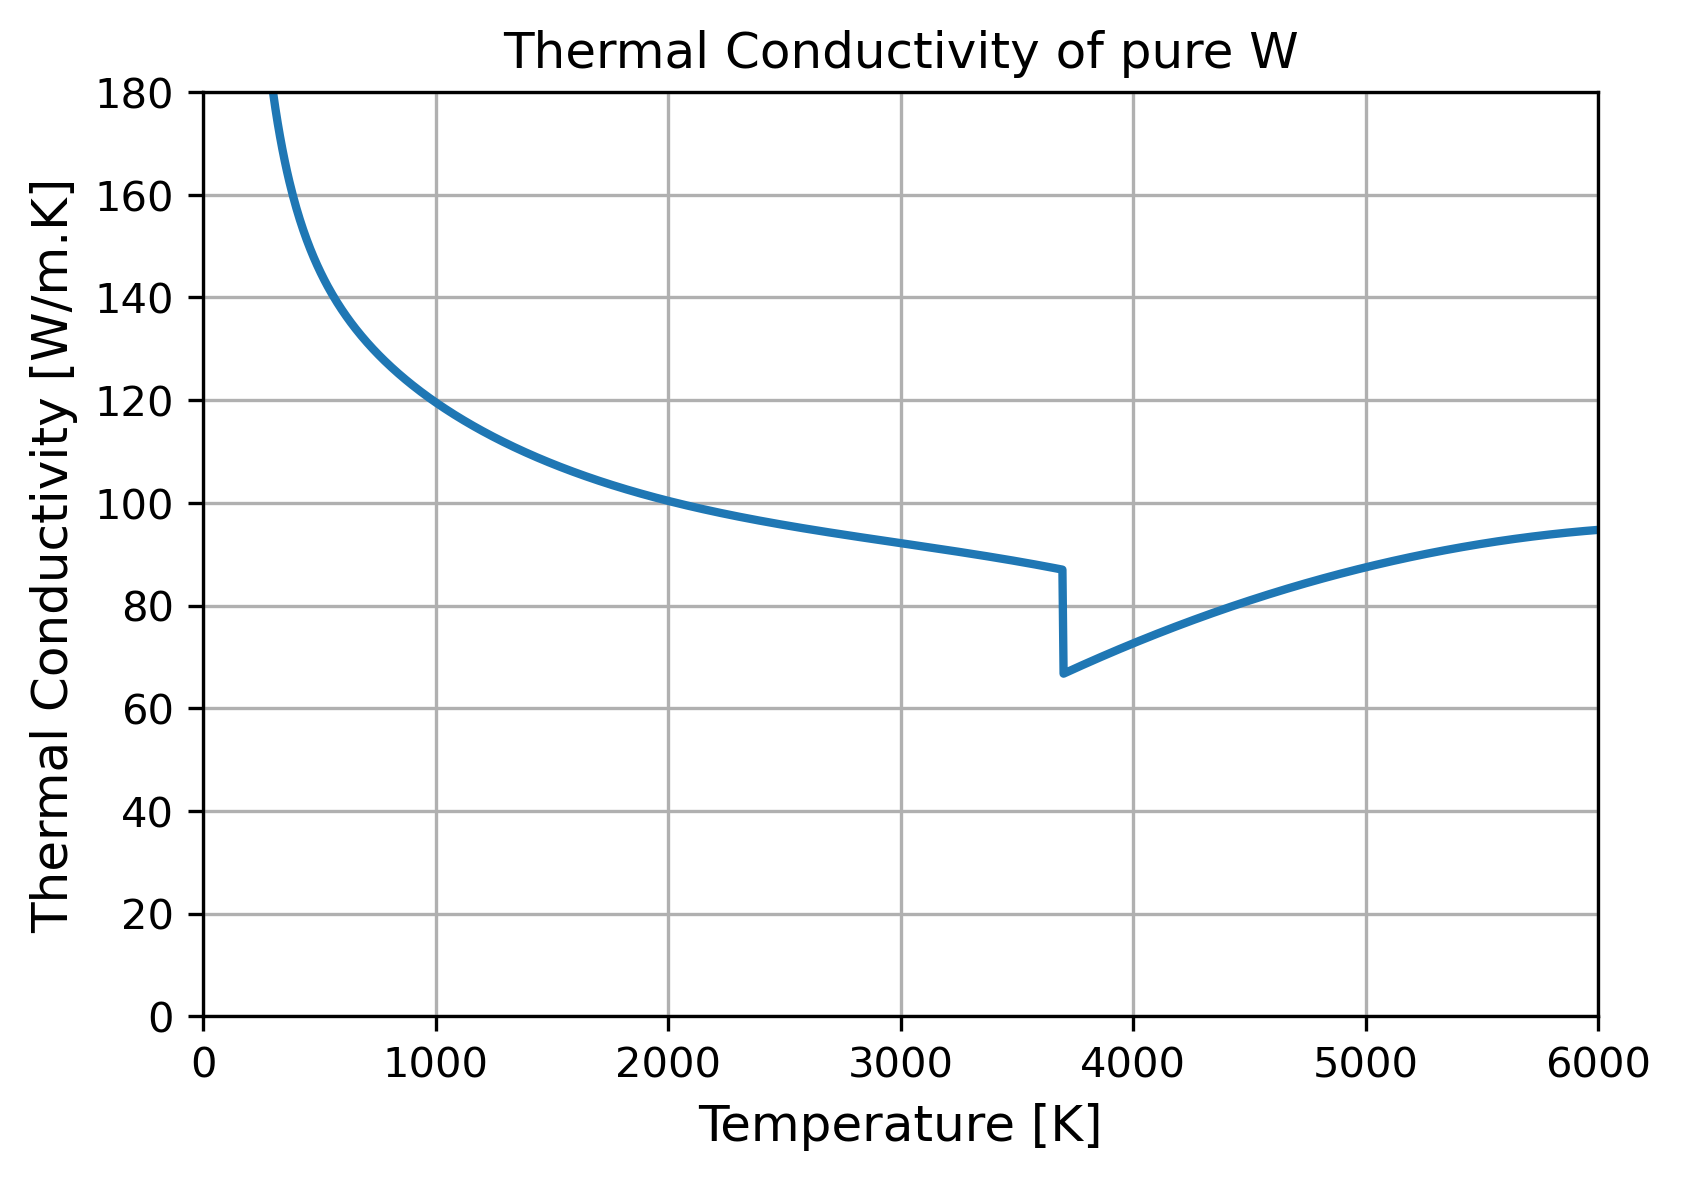

In [5]:
def W_k(T):
    if 300 <= T <= 3695:
        k = 149.441 - 45.466e-3 * T + 13.193e-6 * T**2 - 1.484e-9 * T**3 + 3.866e6 / (T**2)
    elif 3695 < T <= 6000:
        k = 66.6212 + 0.02086 * (T - 3695) - 3.7585e-6 * (T - 3695)**2
    else:
        raise ValueError("Temperature is out of the expected range (300K to 6000K)")
    
    return k

T = np.arange(300, 6001, 5)
k = np.array([W_k(int(t)) for t in T])

title='Thermal Conductivity of pure W'
xlabel='Temperature [K]'
ylabel='Thermal Conductivity [W/m.K]'
xlim_range=[0, 6000]
ylim_range=[0, 180]
plt.figure(figsize=(6, 4), dpi=300)
generic_plot(x_data=T, y_data=k, shift=0, title=title, xlabel=xlabel, ylabel=ylabel, xlim_range=xlim_range, ylim_range=ylim_range, label=None, fsize1=12, fsize2=fsize2, fsize3 = 8)

display(Markdown("""
**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant.pdf](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)
"""))

,WPureTempC,WPureThermalConductivityW/mk,WKdopedTempC1,WKdopedThermalConductivityW/mk1,W1%ReTempC2,W1%ReThermalConductivityW/mk2,W3%ReTempC3,W3%ReThermalConductivityW/mk3,WKdoped3%ReTempC4,WKdoped3%ReThermalConductivityW/mk4,WKdopedRodTempC5,WKdopedRodThermalConductivityW/mk5
0,34.348089,175.566265,32.567222,167.662651,32.161059,147.614458,26.552889,110.795181,31.458085,112.915663,21.350882,174.024096
1,105.680420,176.530120,98.900627,161.879518,96.881529,142.216867,99.474722,110.216867,99.564547,114.650602,97.408760,168.240964
2,204.221749,160.530120,200.859190,154.554217,201.894124,125.638554,196.660874,107.325301,198.406592,113.493976,200.765461,149.927711
3,302.821659,147.421687,301.138427,144.337349,302.235848,118.506024,300.341723,105.012048,303.688661,110.216867,297.807112,139.903614
4,401.566070,141.445783,399.871121,137.783133,402.722071,118.506024,402.483841,106.746988,400.945109,110.795181,399.789108,133.734940
5,501.981996,137.975904,503.563687,136.048193,503.200484,118.120482,502.981781,107.325301,504.688446,111.566265,501.782820,128.144578
6,602.362774,132.771084,602.343247,131.807229,603.647654,116.192771,600.214798,106.746988,603.550019,111.373494,600.562379,123.903614
7,704.356486,127.180723,701.138427,128.337349,700.892386,116.192771,700.693210,106.361446,700.783035,110.795181,699.369276,121.012048
8,801.484056,121.397590,799.921892,124.289157,802.995450,116.000000,801.191150,106.939759,798.027767,110.795181,803.038410,118.120482
9,901.915604,118.698795,901.962469,121.012048,901.860928,116.000000,901.665658,106.361446,903.325457,108.289157,901.896077,117.734940



**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)


**Fitting parameters for Tungsten W_conductivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 36
    # variables        = 4
    chi-square         = 556.201297
    reduced chi-square = 17.3812905
    Akaike info crit   = 106.554008
    Bayesian info crit = 112.888084
    R-squared          = 0.95531562
[[Variables]]
    c0:  177.930693 +/- 2.44931353 (1.38%) (init = 1)
    c1: -0.13240981 +/- 0.02032206 (15.35%) (init = 1)
    c2:  9.6132e-05 +/- 4.3407e-05 (45.15%) (init = 1)
    c3: -2.2117e-08 +/- 2.5724e-08 (116.31%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9867
    C(c1, c2) = -0.9678
    C(c1, c3) = +0.9174
    C(c0, c1) = -0.8403
    C(c0, c2) = +0.7150
    C(c0, c3) = -0.6335


**The equations for Tungsten W_conductivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

**Fitting parameters for Tungsten W_conductivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 36
    # variables        = 4
    chi-square         = 2128.94696
    reduced chi-square = 66.5295924
    Akaike info crit   = 154.875097
    Bayesian info crit = 161.209173
    R-squared          = 0.21953734
[[Variables]]
    c0:  125.760795 +/- 4.79299206 (3.81%) (init = 1)
    c1: -0.05992729 +/- 0.04001920 (66.78%) (init = 1)
    c2:  7.3013e-05 +/- 8.5632e-05 (117.28%) (init = 1)
    c3: -2.5853e-08 +/- 5.0782e-08 (196.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9869
    C(c1, c2) = -0.9683
    C(c1, c3) = +0.9187
    C(c0, c1) = -0.8405
    C(c0, c2) = +0.7164
    C(c0, c3) = -0.6360


**The equations for Tungsten W_conductivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

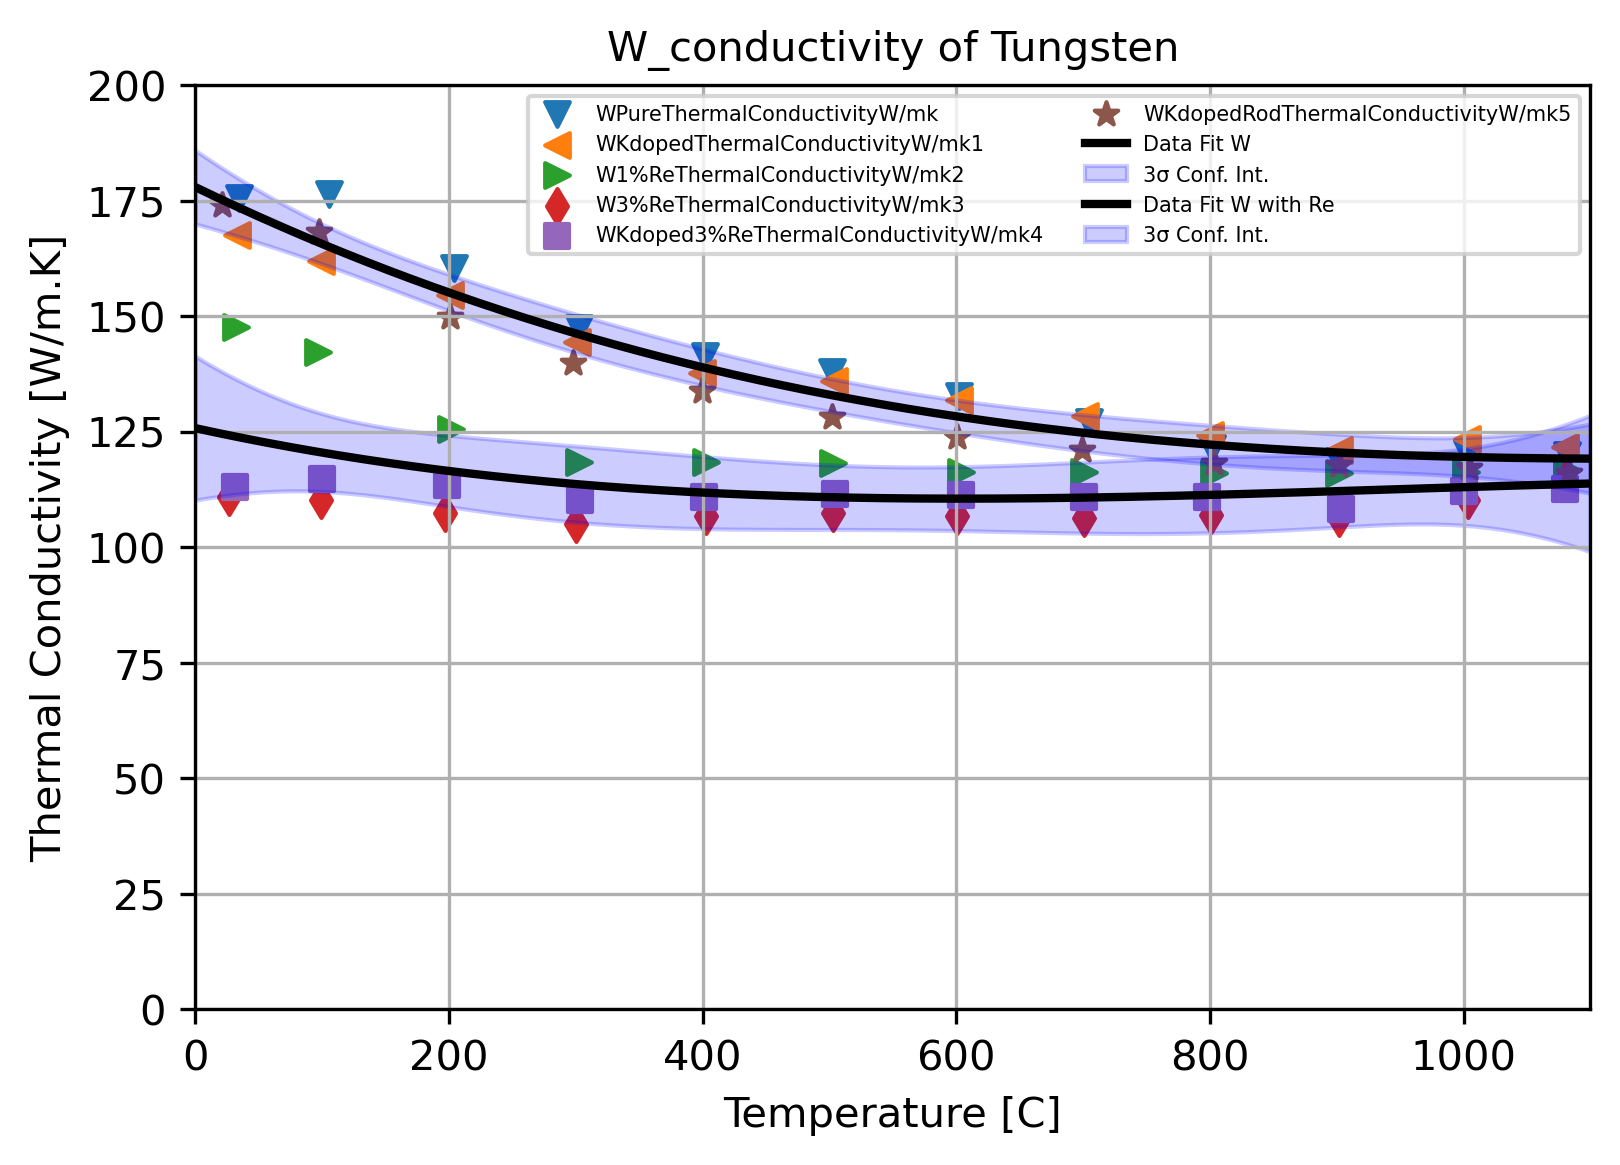

In [6]:
material_property = "W_conductivity"
var_names, variables, datafream = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15)
x_label='Temperature [C]'
y_label=r'Thermal Conductivity [W/m.K]'
x_lim=[0, 1100]
y_lim=[0, 200]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(0,1100,1100)
fit_result0 = get_model_fit_and_print_it(np.array(vars_x)[[0,1,5]].flatten(), np.array(vars_y)[[0,1,5]].flatten(), fit_func='poly', param_initials=p, method='leastsq', material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
fit_result1 = get_model_fit_and_print_it(np.array(vars_x)[[2,3,4]].flatten(), np.array(vars_y)[[2,3,4]].flatten(), fit_func='poly', param_initials=p, method='leastsq', material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

data_plot(x_data_list, y_data_list, x_label=x_label, 
          y_label=y_label, title=material_property + " of " + material_name, scale='linear', x_lim=x_lim, y_lim=y_lim,
          grid=True, legend=True, data_labels=data_labels, fit_labels=['fit1', 'fit2'],
          data_colors=None, fit_colors=None, marker_size=m_size, 
          fit_line_width=2, x_label_font_size=f_size, y_label_font_size=f_size,
          title_font_size=f_size, legend_font_size=5, legend_loc='best', legend_num_cols=2)


fit_plot(T, fit_result0, legend_font_size=5, legend_loc="best", fit_label='Data Fit W ', fit_line_color='black')
fit_plot(T, fit_result1, legend_font_size=5, legend_loc="best", fit_label='Data Fit W with Re', fit_line_color='black')

rho_coeff = [fit_result0.params[key].value for key in fit_result0.params]

def ThermalConductivity(T):
    return sum(rho_coeff[i] * T**i for i in range(len(rho_coeff)))

## 3.5 Thermal Diffusivity

,WFujitsukaTempC,WFujitsukaThermalDiffusivityCoefmm2/s,WtanabeTempC1,WtanabeThermalDiffusivityCoefmm2/s1,WTouloukianTempC2,WTouloukianThermalDiffusivityCoefmm2/s2,WSingleCrystalTempC3,WSingleCrystalThermalDiffusivityCoefmm2/s3
0,28.201282,71.586071,20.588269,64.556553,23.302820,66.200865,26.069032,68.796319
1,120.537905,69.786949,142.500900,59.774810,78.707603,62.819626,95.101018,64.397353
2,173.971327,65.341435,179.905802,57.562509,120.015090,59.687661,196.352816,58.208601
3,204.686914,61.333514,467.840243,49.052184,221.450146,54.367032,293.027000,53.633560
4,285.317603,60.804963,549.340853,47.167562,325.739377,50.866130,391.670972,51.749179
5,343.121446,54.843398,670.097187,45.166693,426.279736,47.992158,495.298409,49.429797
6,450.093666,51.627290,758.253427,43.927735,522.131093,45.745004,591.253669,47.493850
7,553.402218,48.508590,NaN,NaN,623.629057,43.812208,NaN,NaN
8,642.800094,46.366668,NaN,NaN,722.308960,42.004553,NaN,NaN
9,756.401983,44.863605,NaN,NaN,824.751714,40.322820,NaN,NaN



**Data Source:**  
- [Fukuda2018--Thermal properties of pure tungsten and its alloys for fusion applications](https://drive.google.com/file/d/1HnPIj_yDMyvEg-_nyPLBX7_9lSo6nPlP/view?usp=drive_link)  
- [Tanabe2003--Temperature dependence of thermal conductivity in W and W–Re alloys from 300 to 1000 K](https://drive.google.com/file/d/1J9fqNc03hZZMfeQ57RfdYDqfaMAiDhWY/view?usp=drive_link)  
- [Touloukian1974--Thermophysical Properties of Matter-The TPRC Data Series. Volume 10. Thermal Diffusivity](https://drive.google.com/file/d/1MQrFR5Kc7M4WEu0LpVEUsT3CWVTF1yF6/view?usp=drive_link)  
- [Fujitsuka2000--Effect of neutron irradiation on thermal diffusivity of tungsten–rhenium alloys](https://drive.google.com/file/d/1LlHMZ-vDTaWnlpitQPfjvOoO5xZGedNo/view?usp=drive_link)


**Fitting parameters for Tungsten W_diffusivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 37
    # variables        = 4
    chi-square         = 228.748636
    reduced chi-square = 6.93177684
    Akaike info crit   = 75.4031156
    Bayesian info crit = 81.8467873
    R-squared          = 0.93177780
[[Variables]]
    c0:  69.2682493 +/- 1.32658223 (1.92%) (init = 1)
    c1: -0.05814087 +/- 0.01177767 (20.26%) (init = 1)
    c2:  4.0477e-05 +/- 2.6194e-05 (64.71%) (init = 1)
    c3: -1.3226e-08 +/- 1.5926e-08 (120.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9839
    C(c1, c2) = -0.9674
    C(c1, c3) = +0.9125
    C(c0, c1) = -0.8452
    C(c0, c2) = +0.7237
    C(c0, c3) = -0.6409


**The equations for Tungsten W_diffusivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

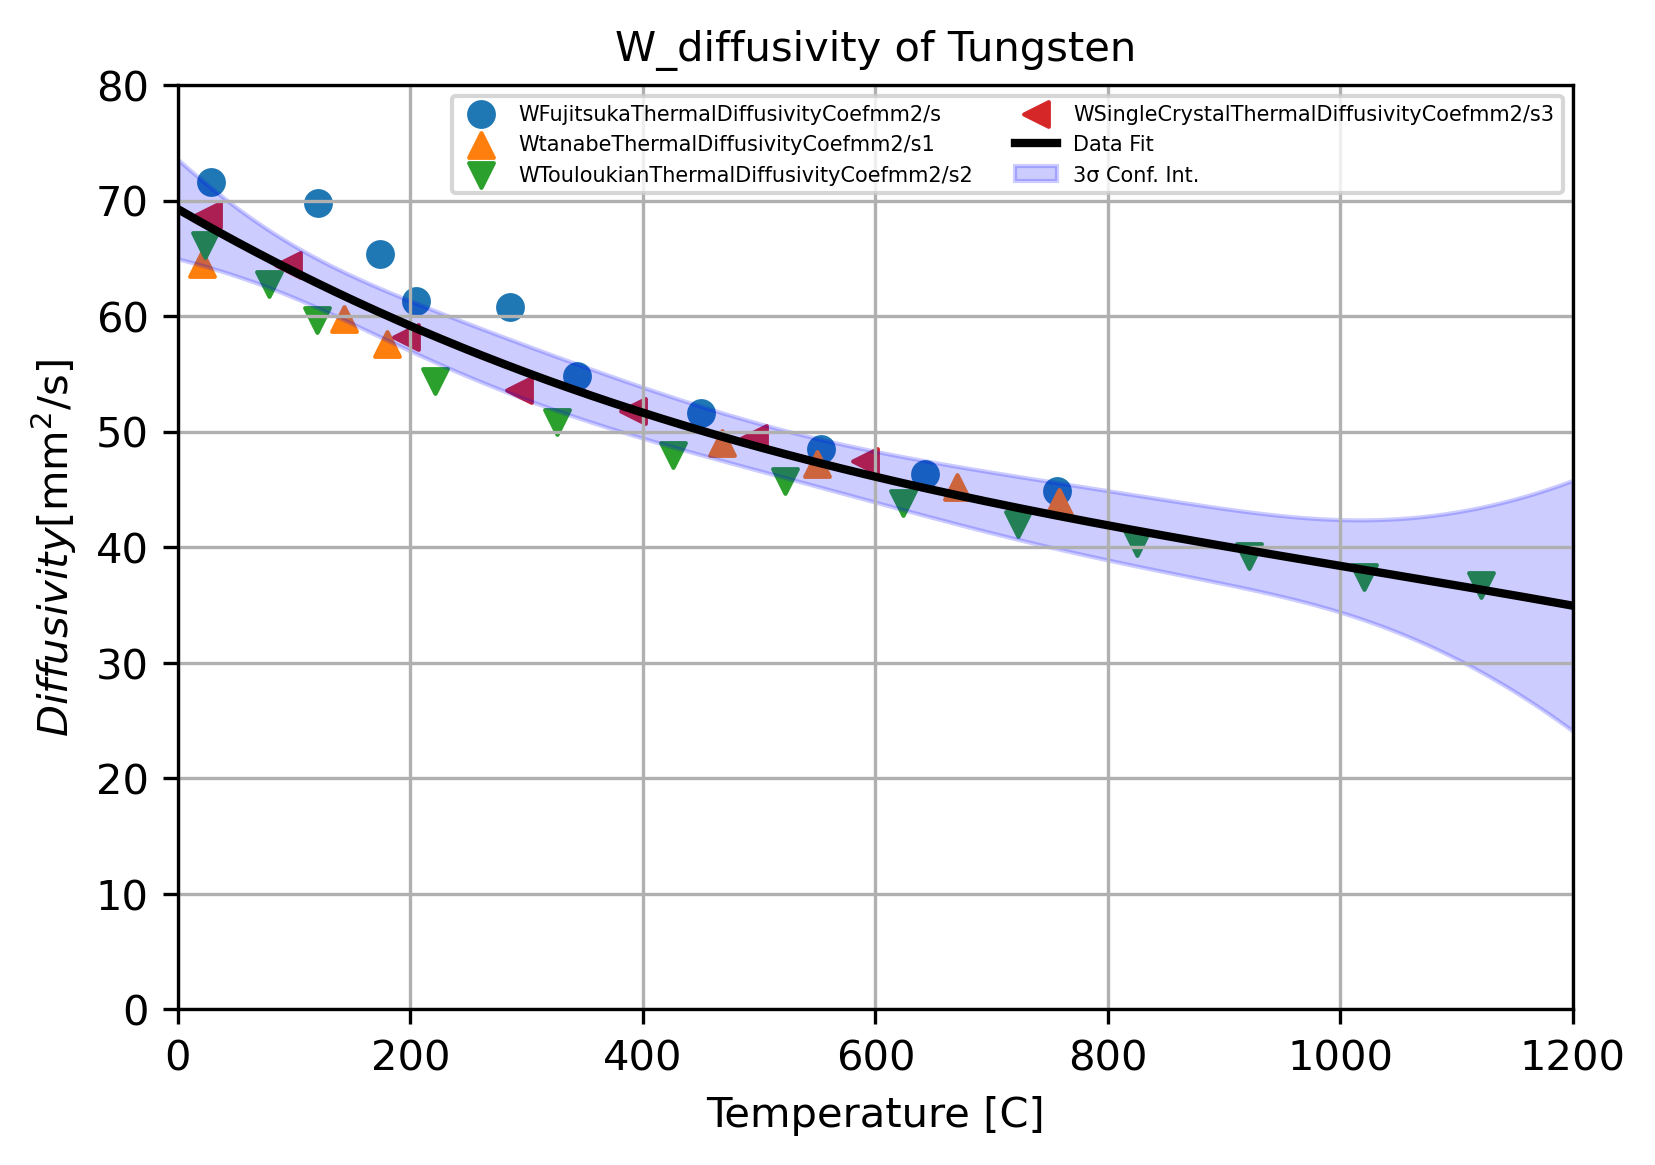

In [7]:
material_property = "W_diffusivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=16)
x_label = 'Temperature [C]'
y_label = r'$Diffusivity [$mm$^2$/s]'
x_lim = [0, 1200]
y_lim = [0, 80]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Fukuda2018--Thermal properties of pure tungsten and its alloys for fusion applications](https://drive.google.com/file/d/1HnPIj_yDMyvEg-_nyPLBX7_9lSo6nPlP/view?usp=drive_link)  
- [Tanabe2003--Temperature dependence of thermal conductivity in W and W–Re alloys from 300 to 1000 K](https://drive.google.com/file/d/1J9fqNc03hZZMfeQ57RfdYDqfaMAiDhWY/view?usp=drive_link)  
- [Touloukian1974--Thermophysical Properties of Matter-The TPRC Data Series. Volume 10. Thermal Diffusivity](https://drive.google.com/file/d/1MQrFR5Kc7M4WEu0LpVEUsT3CWVTF1yF6/view?usp=drive_link)  
- [Fujitsuka2000--Effect of neutron irradiation on thermal diffusivity of tungsten–rhenium alloys](https://drive.google.com/file/d/1LlHMZ-vDTaWnlpitQPfjvOoO5xZGedNo/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(0,1200,1200)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

diffusivity_coef = [fit_result.params[key].value for key in fit_result.params]

def ThermalDiffusivity(T):
    return sum(diffusivity_coef[i] * T**i for i in range(len(diffusivity_coef)))

## 3.6 Thermal Emissivity

,WMinissale_shortTempK,WMinissale_shortThermalEmissivity,WMinissale_longTempK1,WMinissale_longThermalEmissivity1,WMinissale_intermediateTempK2,WMinissale_intermediateThermalEmissivity2,WBroduTempK3,WBroduThermalEmissivity3,WRudkinTempK4,WRudkinThermalEmissivity4,WMatsumotoTempK5,WMatsumotoThermalEmissivity5,WWorthingTempK6,WWorthingThermalEmissivity6
0,42.44,0.02905,38.40,0.01385,43.07,0.01643,853.44,0.06718,1364.00,0.27669,1833.14,0.23873,1345.01,0.19629
1,158.90,0.04481,160.25,0.02073,156.92,0.02264,884.53,0.08141,1683.16,0.31258,1959.11,0.25306,1869.29,0.26863
2,276.74,0.06636,273.45,0.03824,277.69,0.03753,925.21,0.11031,1961.84,0.33309,2079.38,0.26529,2416.00,0.31879
3,461.49,0.10078,457.42,0.06514,460.21,0.06141,1024.28,0.15948,2244.50,0.34633,2163.37,0.27372,2958.98,0.34808
4,589.35,0.13616,610.29,0.08453,593.49,0.08716,1125.40,0.20176,2542.71,0.35573,2258.82,0.28299,3500.04,0.37027
5,724.59,0.16511,706.32,0.11330,721.15,0.11167,1160.33,0.22246,2819.71,0.35787,2354.32,0.28890,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1240.15,0.24877,NaN,NaN,2447.86,0.29859,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1343.66,0.25999,NaN,NaN,2541.46,0.30323,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,1349.31,0.27551,NaN,NaN,2682.83,0.30955,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,1427.43,0.28414,NaN,NaN,2789.79,0.31630,NaN,NaN



**Data Source:**  
- [Forsythe--THE PROPERTIES OF TUNGSTEN AND THE CHAR- ACTERISTICS OF TUNGSTEN LAMPS.pdf](https://drive.google.com/file/d/1Iw3L-8V_43S0NLxPDxP7yJ_A2h379dj4/view?usp=drive_link)
- [Matsumoto1999--Hemispherical Total Emissivity of Niobium, Molybdenum, and Tungsten at High Temperatures Using a Combined Transient and Brief Steady-State Technique.pdf](https://drive.google.com/file/d/1c6v2C_VoiWPI9h5eGWFHrmb0IjQ2oIyH/view?usp=drive_link)
- [Brodu2015--Evolution of the emissivity of tungsten at high temperature with and without proton bombardment](https://drive.google.com/file/d/1zZ0fDKf94yGSIllnX69O0zBpwyMcAWUI/view?usp=drive_link)


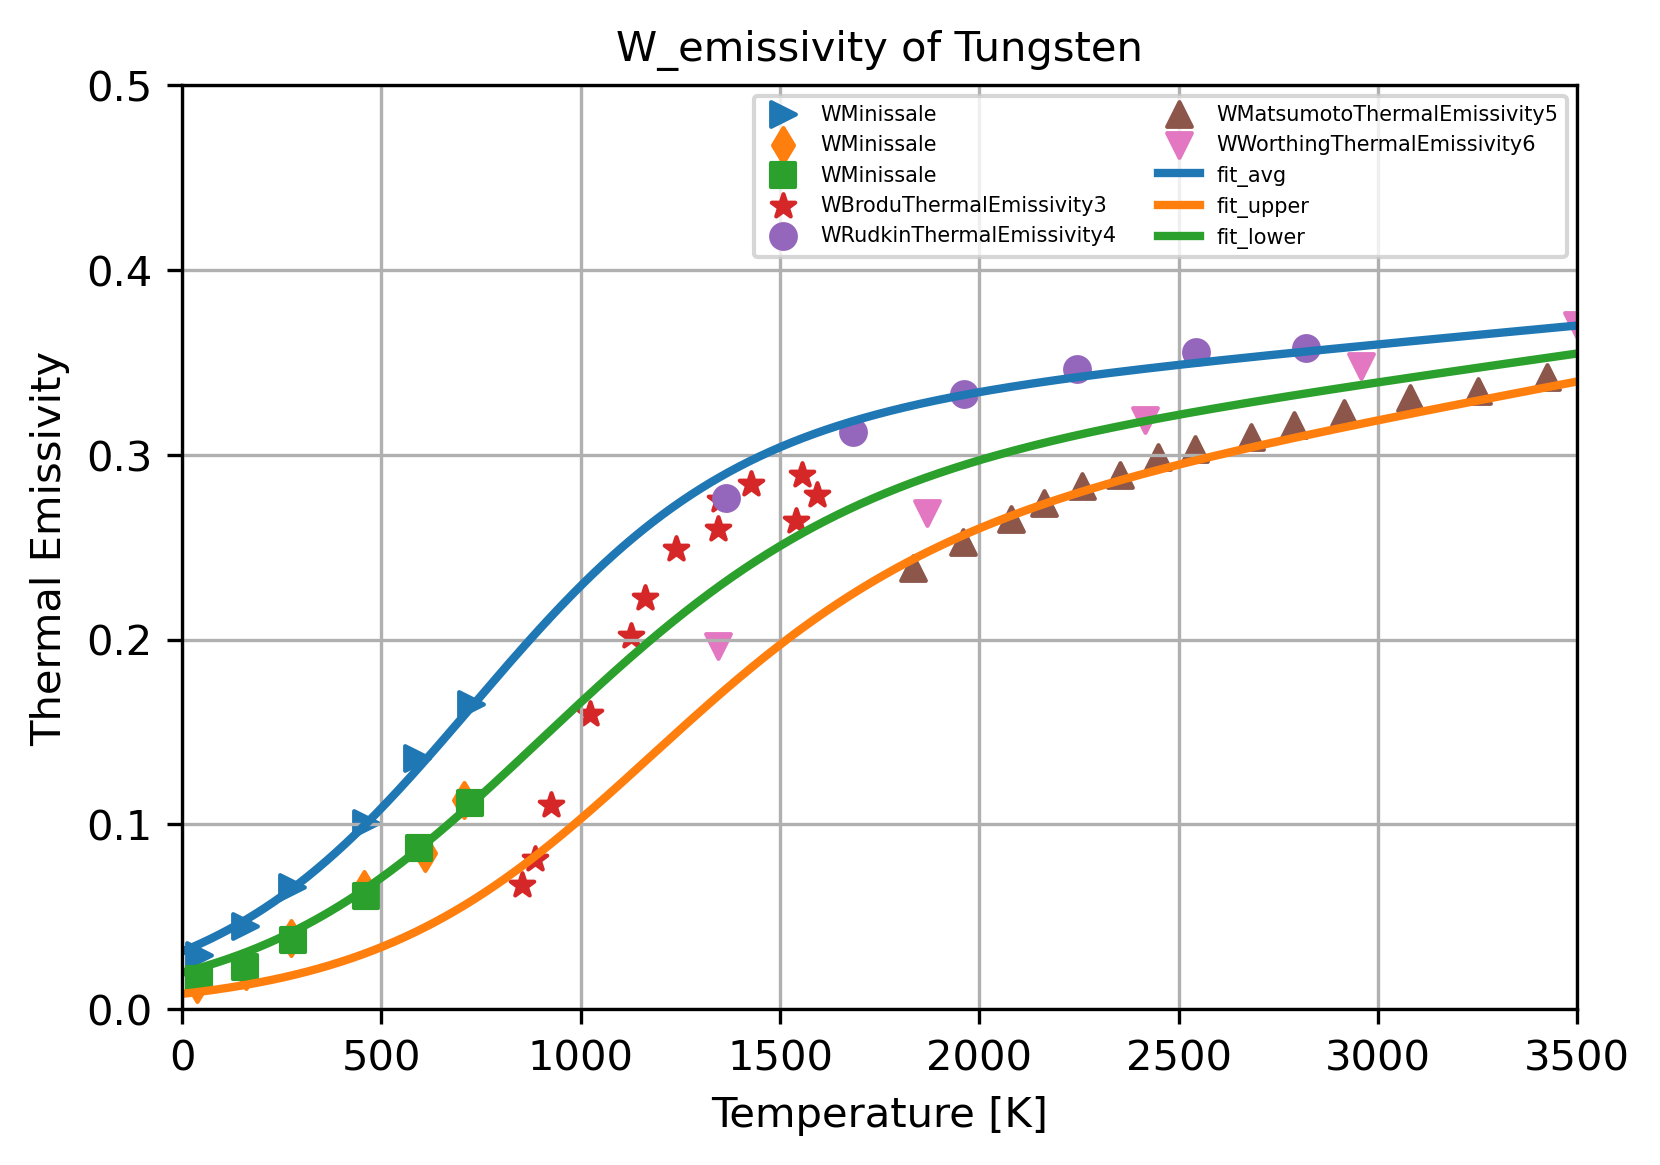

In [8]:
material_property = "W_emissivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=20)
x_label = 'Temperature [K]'
y_label = r'Thermal Emissivity'
x_lim=[0, 3500]
y_lim=[0, 0.5]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Forsythe--THE PROPERTIES OF TUNGSTEN AND THE CHAR- ACTERISTICS OF TUNGSTEN LAMPS.pdf](https://drive.google.com/file/d/1Iw3L-8V_43S0NLxPDxP7yJ_A2h379dj4/view?usp=drive_link)
- [Matsumoto1999--Hemispherical Total Emissivity of Niobium, Molybdenum, and Tungsten at High Temperatures Using a Combined Transient and Brief Steady-State Technique.pdf](https://drive.google.com/file/d/1c6v2C_VoiWPI9h5eGWFHrmb0IjQ2oIyH/view?usp=drive_link)
- [Brodu2015--Evolution of the emissivity of tungsten at high temperature with and without proton bombardment](https://drive.google.com/file/d/1zZ0fDKf94yGSIllnX69O0zBpwyMcAWUI/view?usp=drive_link)
"""))


vars_x = variables[::2] 
vars_y = variables[1::2]

# Define the fit functions for the upper (εu), lower (εl), and average emissivity (εavg)
epsilon_avg_func = lambda T: (epsilon_upper_func(T)+epsilon_lower_func(T))/2
epsilon_upper_func = lambda T: 0.5 * (0.55 + 2e-5 * T - 0.25) * (1 + np.tanh((T - 700) / 650))
epsilon_lower_func = lambda T: 0.5 * (0.45 + 4e-5 * T - 0.25) * (1 + np.tanh((T - 1100) / 700))

# Example usage: Generate the fitted data
T = np.linspace(0,3500,3500)
Y_fit_avg = epsilon_avg_func(T)
Y_fit_upper = epsilon_upper_func(T)
Y_fit_lower = epsilon_lower_func(T)

data_plot(vars_x, vars_y, x_fit_list=[T, T, T], y_fit_list=[Y_fit_upper, Y_fit_lower, Y_fit_avg],\
            x_label=x_label, y_label=y_label, title=material_property + " of " + material_name,\
            scale='linear', x_lim=x_lim, y_lim=y_lim,\
            grid=True, legend=True, data_labels=data_labels, fit_labels=["fit_avg", "fit_upper", "fit_lower"],\
            data_colors=None, fit_colors=None, marker_size=m_size,\
            fit_line_width=2, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
            legend_font_size=5, legend_loc='best', legend_num_cols=2)

NormalEmissivity = epsilon_avg_func

## 3.7 Electrical Resistivity

,WForsytheTempK,WForsytheElectricalResistivityx108ohmm,WDesiaTempK1,WDesiaElectricalResistivityx108ohmm1,WRudkinTempK2,WRudkinElectricalResistivityx108ohmm2
0,300.0,7.18,10,0.000137,1540.61,39.63
1,400.0,10.26,15,0.000567,1810.32,51.19
2,500.0,13.66,20,0.001960,2079.63,57.10
3,600.0,17.23,30,0.013300,2345.26,67.27
4,800.0,24.80,40,0.054300,2610.41,81.49
5,900.0,28.75,50,0.141000,NaN,NaN
6,1000.0,32.73,60,0.266000,NaN,NaN
7,1100.0,36.84,70,0.422000,NaN,NaN
8,1200.0,40.80,80,0.606000,NaN,NaN
9,1300.0,44.90,90,0.809000,NaN,NaN


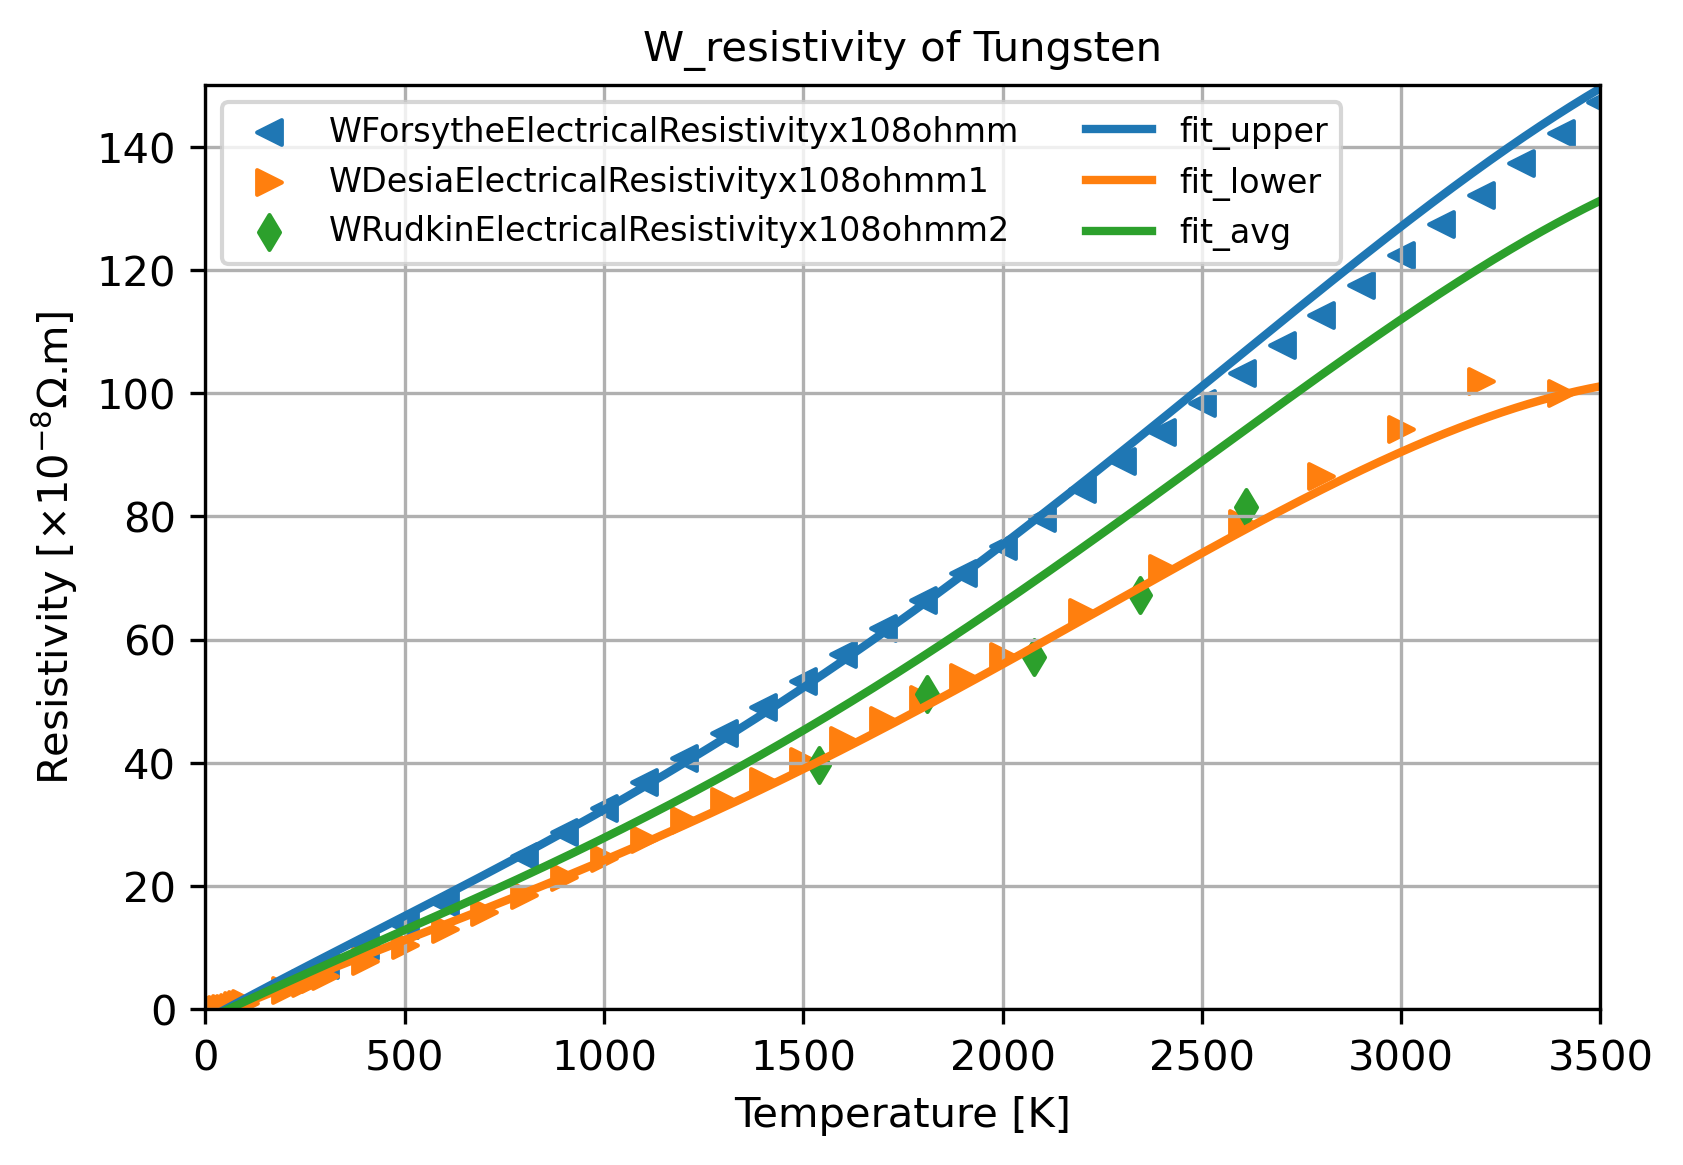

In [9]:
material_property = "W_resistivity"
var_names, variables, datafream = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=40)
x_label='Temperature [K]'
y_label=r'Resistivity [$\times 10^{-8} \Omega$.m]'
x_lim=[0, 3500]
y_lim=[0, 150]
data_labels = [var.split('_')[0] for var in var_names[1::2]]

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]

# Curve fit functions for average (ρ), upper (ρu), and lower (ρl)
rho_avg_func = lambda T: -1.005e-12 * T**4 + 5.943e-9 * T**3 - 6.539e-6 * T**2 + 0.031187 * T - 1.784
rho_upper_func = lambda T: -1.005e-12 * T**4 + 6e-9 * T**3 - 6.539e-6 * T**2 + 0.0357 * T - 1.784
rho_lower_func = lambda T: -1.005e-12 * T**4 + 5.5e-9 * T**3 - 6.539e-6 * T**2 + 0.028 * T - 1.784

# Example usage to generate fitted data
T = np.linspace(0,3500,3500)
Y_fit_avg = rho_avg_func(T)
Y_fit_upper = rho_upper_func(T)
Y_fit_lower = rho_lower_func(T)


data_plot(x_data_list, y_data_list, x_fit_list=[T, T, T], y_fit_list=[Y_fit_upper, Y_fit_lower, Y_fit_avg],\
            x_label=x_label, y_label=y_label, title=material_property + " of " + material_name,\
            scale='linear', x_lim=x_lim, y_lim=y_lim,\
            grid=True, legend=True, data_labels=data_labels, fit_labels=["fit_upper", "fit_lower", "fit_avg"],\
            data_colors=None, fit_colors=None, marker_size=m_size,\
            fit_line_width=2, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
            legend_font_size=8, legend_loc='best', legend_num_cols=2)

ElectricalResistivity = rho_avg_func